In [11]:
import pandas as pd
file_path = "raw_data/mpst_full_data.csv"
df = pd.read_csv(file_path)
df.head()

,imdb_id,title,plot_synopsis,tags,split,synopsis_source
0,tt0057603,I tre volti della paura,Note: this synopsis is for the orginal Italian...,"cult, horror, gothic, murder, atmospheric",train,imdb
1,tt1733125,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a s...",violence,train,imdb
2,tt0033045,The Shop Around the Corner,"Matuschek's, a gift store in Budapest, is the ...",romantic,test,imdb
3,tt0113862,Mr. Holland's Opus,"Glenn Holland, not a morning person by anyone'...","inspiring, romantic, stupid, feel-good",train,imdb
4,tt0086250,Scarface,"In May 1980, a Cuban man named Tony Montana (A...","cruelty, murder, dramatic, cult, violence, atm...",val,imdb


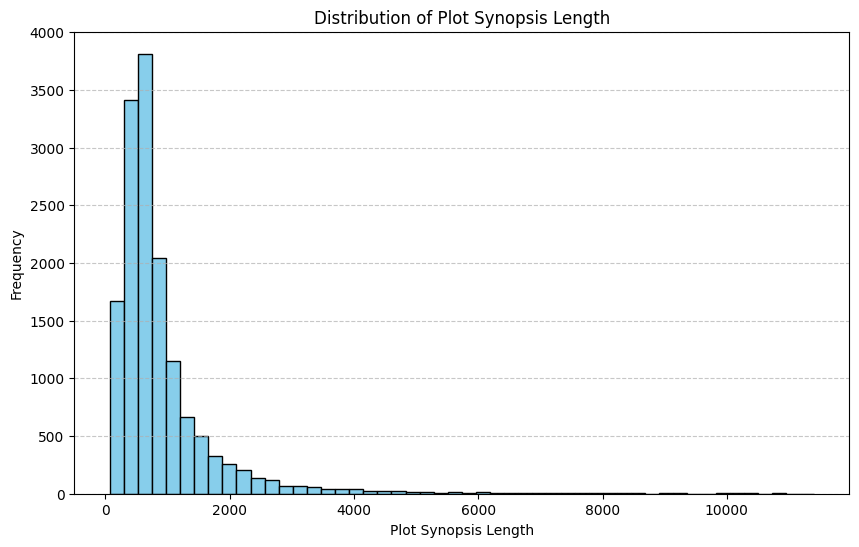

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df['plot_synopsis'].apply(lambda x: len(x.split())), bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Plot Synopsis Length')
plt.xlabel('Plot Synopsis Length')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [12]:
df['plot_word_count'] = df ['plot_synopsis'].apply(lambda x: len(x.split()))

In [38]:
df_500 = df[df['plot_word_count'] < 500].copy()
df_500 = df_500.drop(columns = 'plot_word_count', axis = 1)

In [32]:
len(df_500)

4771

In [73]:
# Lower case
df['plot_synopsis'] = df['plot_synopsis'].apply(lambda x: x.lower())

In [74]:
# Remove punctuation and numbers
import re
df['plot_synopsis'] = df['plot_synopsis'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

In [75]:
# Tokenize text
from nltk.tokenize import word_tokenize
df['plot_synopsis'] = df['plot_synopsis'].apply(lambda x: word_tokenize(x))

In [76]:
# Remove  Stopwords
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english'))
df['plot_synopsis'] = df['plot_synopsis'].apply(lambda x: [w for w in x if not w in stop_words])
df.head()

,imdb_id,title,plot_synopsis,tags,split,synopsis_source,plot_word_count
0,tt0057603,I tre volti della paura,"[note, synopsis, orginal, italian, release, se...","cult, horror, gothic, murder, atmospheric",train,imdb,1315
1,tt1733125,Dungeons & Dragons: The Book of Vile Darkness,"[two, thousand, years, ago, nhagruul, foul, so...",violence,train,imdb,378
2,tt0033045,The Shop Around the Corner,"[matuscheks, gift, store, budapest, workplace,...",romantic,test,imdb,707
3,tt0113862,Mr. Holland's Opus,"[glenn, holland, morning, person, anyones, sta...","inspiring, romantic, stupid, feel-good",train,imdb,2317
4,tt0086250,Scarface,"[may, cuban, man, named, tony, montana, al, pa...","cruelty, murder, dramatic, cult, violence, atm...",val,imdb,3063


In [77]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df['plot_synopsis'] = df['plot_synopsis'].apply(lambda x: [lemmatizer.lemmatize(w) for w in x])

In [78]:
df['plot_synopsis']

0        [note, synopsis, orginal, italian, release, se...
1        [two, thousand, year, ago, nhagruul, foul, sor...
2        [matuscheks, gift, store, budapest, workplace,...
3        [glenn, holland, morning, person, anyones, sta...
4        [may, cuban, man, named, tony, montana, al, pa...
                               ...                        
14823    [rus, richards, john, travolta, weatherman, ha...
14824    [russia, medium, cover, tony, starks, disclosu...
14825    [north, african, campaign, world, war, ii, cap...
14826    [steven, kenet, catch, unfaithful, wife, apart...
14827    [sometime, chicago, man, cecil, moe, michael, ...
Name: plot_synopsis, Length: 14828, dtype: object

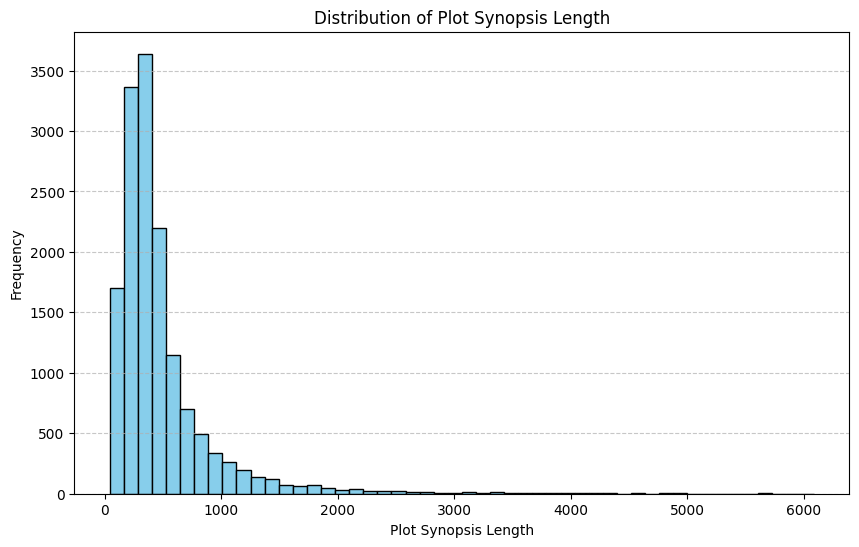

In [79]:
plt.figure(figsize=(10, 6))
plt.hist(df['plot_synopsis'].apply(len), bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Plot Synopsis Length')
plt.xlabel('Plot Synopsis Length')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [89]:
df_2000 = df[df['plot_word_count'] < 500].copy()
df_2000 = df_2000.drop(columns = 'plot_word_count', axis = 1)

In [90]:
len(df_2000)

4771

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

df_2000['plot_synopsis_str'] = df_2000['plot_synopsis'].apply(lambda x: ' '.join(x))
tf_idf_vectorizer = TfidfVectorizer(stop_words='english')
tf_idf_matrix = tf_idf_vectorizer.fit_transform(df_2000['plot_synopsis_str'])

In [104]:
def find_recommendation(text):
    user_tf_idf_vector = tf_idf_vectorizer.transform([text])
    cos_similarities = linear_kernel(user_tf_idf_vector, tf_idf_matrix).flatten()
    similar_movies = pd.DataFrame({'title': df_2000['title'], 'similarity': cos_similarities})
    similar_movies = similar_movies.sort_values(by='similarity', ascending=False)
    recommendations = f"Top 5 recommendations {similar_movies.head(10)['title'].tolist()}"
    return similar_movies.head(10)

In [105]:
print(find_recommendation('film about a drug addict in america looking for work'))

                                                   title  similarity
390                                              Rolling    0.172089
7997                                          3 dev adam    0.158885
9925                                     Cocaine Cowboys    0.153446
11667                                 Permanent Midnight    0.127426
11755                                     Out for a Kill    0.119440
2472                              L'albero degli zoccoli    0.114737
11575                                        Little Fish    0.112877
8401                            Number One with a Bullet    0.110791
6998                            Number One with a Bullet    0.110791
3191   Monumental: In Search of America's National Tr...    0.110492
